# Chandelier Exit

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:chandelier_exit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
import talib as ta

In [4]:
df['ATR'] = ta.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=22)

In [5]:
df['High_22'] = df['High'].rolling(22).max()
df['Low_22'] = df['Low'].rolling(22).min()

In [6]:
df['CH_Long'] = df['High_22'] - df['ATR'] * 3 
df['CH_Short'] = df['Low_22'] + df['ATR'] * 3

In [7]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,ATR,High_22,Low_22,CH_Long,CH_Short
Date,,,,,,,,,,,
2018-08-31,226.509995,228.869995,226.000000,227.630005,225.869812,43340100,4.367595,228.869995,200.350006,215.767211,213.452790
2018-09-04,228.410004,229.179993,226.630005,228.360001,226.594162,27390100,4.319530,229.179993,204.520004,216.221402,217.478595
2018-09-05,228.990005,229.669998,225.100006,226.869995,225.115677,33333000,4.330915,229.669998,204.520004,216.677253,217.512749
2018-09-06,226.229996,227.350006,221.300003,223.100006,221.374847,34290000,4.409055,229.669998,204.520004,216.442832,217.747170
2018-09-07,221.850006,225.369995,220.710007,221.300003,219.588760,37619800,4.420461,229.669998,204.520004,216.408614,217.781388


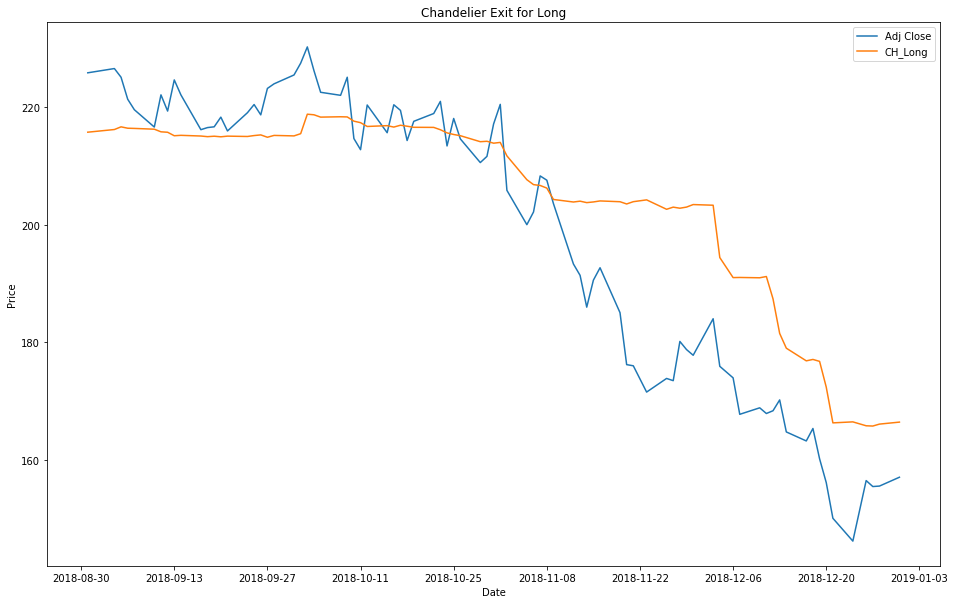

In [8]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['CH_Long'])
plt.title('Chandelier Exit for Long')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

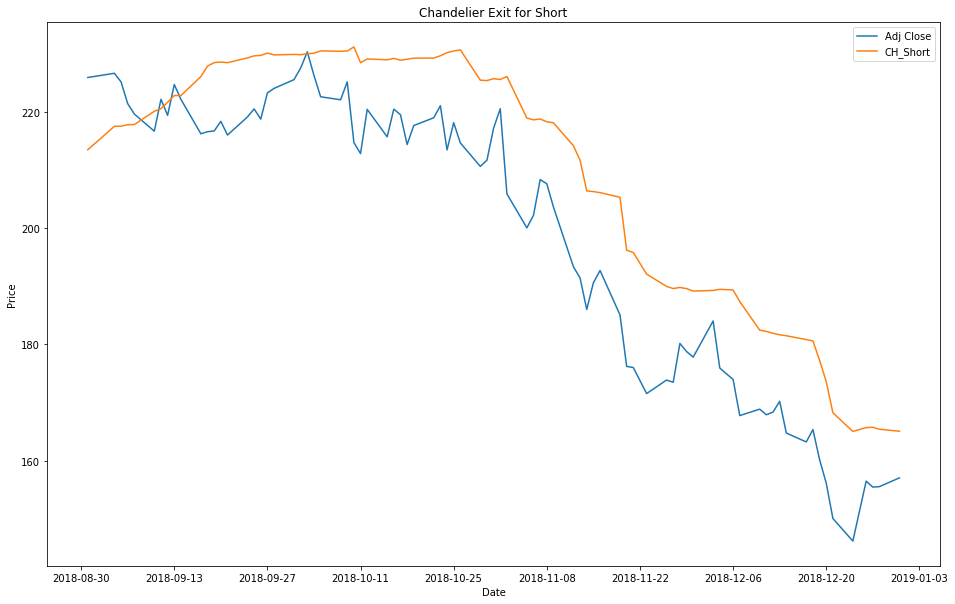

In [9]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['CH_Short'])
plt.title('Chandelier Exit for Short')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

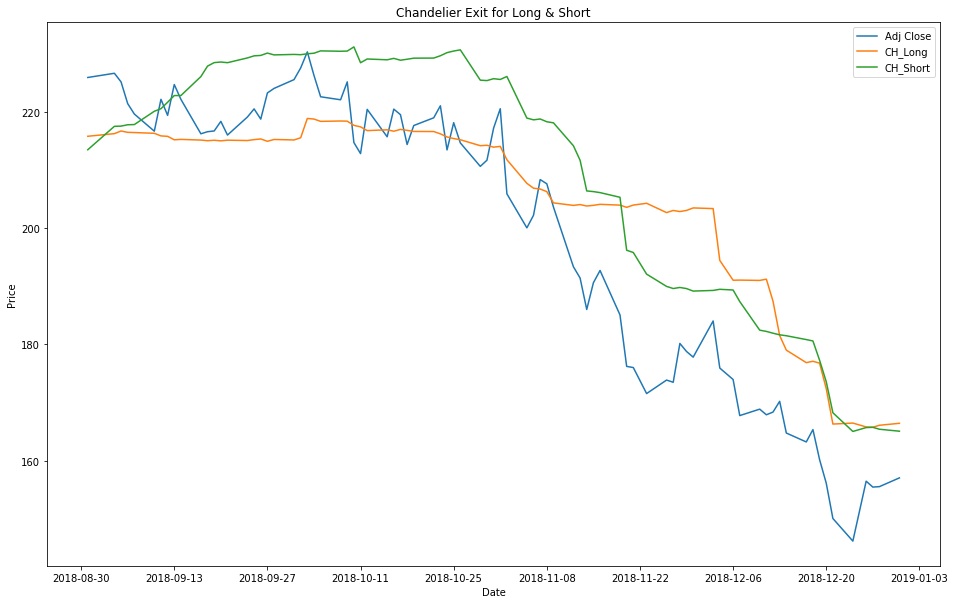

In [10]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['CH_Long'])
plt.plot(df['CH_Short'])
plt.title('Chandelier Exit for Long & Short')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## Candlestick with Chandelier Exit

In [11]:
from matplotlib import dates as mdates
import datetime as dt


df['VolumePositive'] = df['Open'] < df['Adj Close']
df = df.dropna()
df = df.reset_index()
df['Date'] = mdates.date2num(df['Date'].astype(dt.date))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ATR,High_22,Low_22,CH_Long,CH_Short,VolumePositive
0,736937.0,226.509995,228.869995,226.000000,227.630005,225.869812,43340100,4.367595,228.869995,200.350006,215.767211,213.452790,False
1,736941.0,228.410004,229.179993,226.630005,228.360001,226.594162,27390100,4.319530,229.179993,204.520004,216.221402,217.478595,False
2,736942.0,228.990005,229.669998,225.100006,226.869995,225.115677,33333000,4.330915,229.669998,204.520004,216.677253,217.512749,False
3,736943.0,226.229996,227.350006,221.300003,223.100006,221.374847,34290000,4.409055,229.669998,204.520004,216.442832,217.747170,False
4,736944.0,221.850006,225.369995,220.710007,221.300003,219.588760,37619800,4.420461,229.669998,204.520004,216.408614,217.781388,False


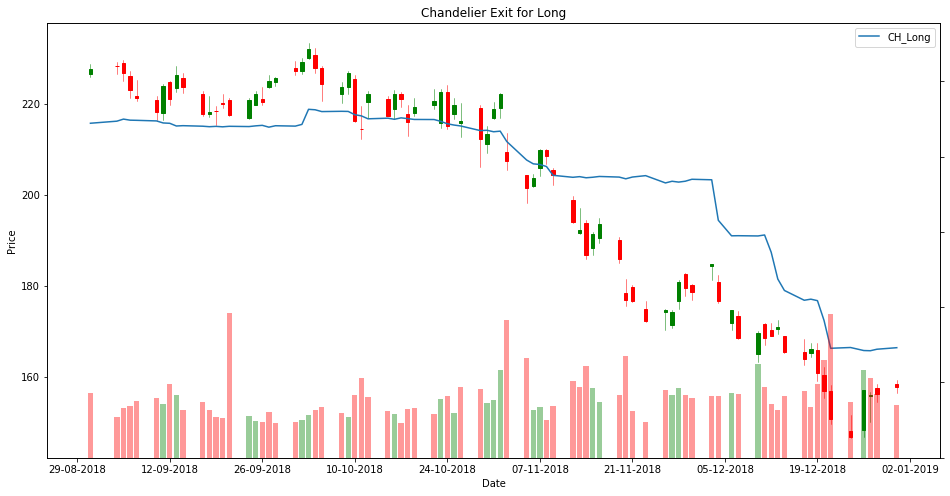

In [12]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['CH_Long'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Chandelier Exit for Long')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

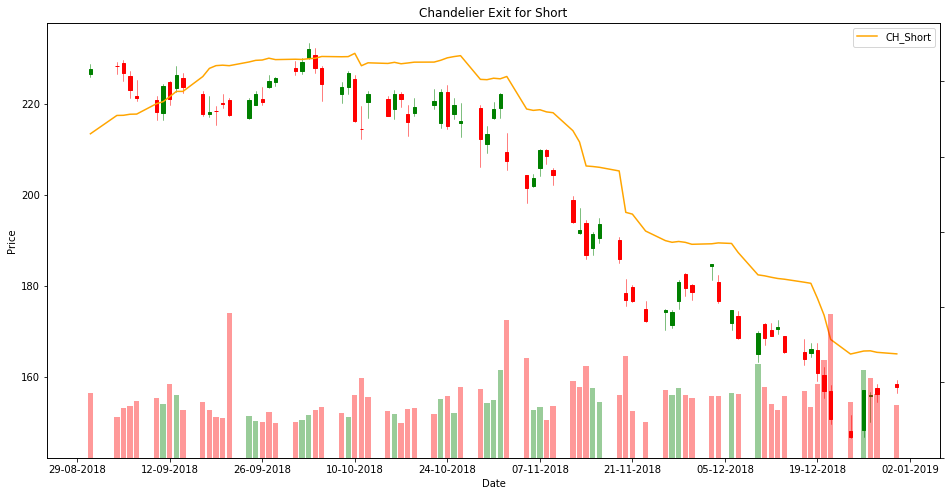

In [13]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['CH_Short'], color='Orange')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Chandelier Exit for Short')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

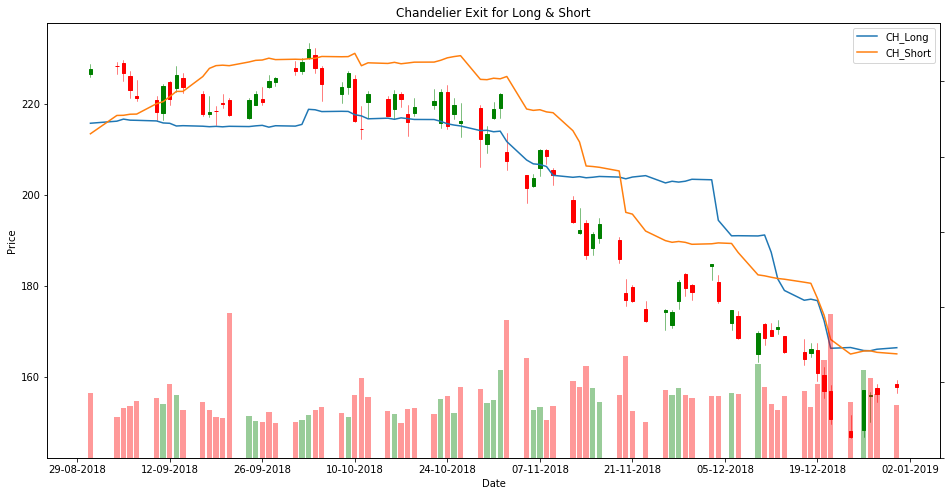

In [14]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.Date, df['CH_Long'])
ax1.plot(df.Date, df['CH_Short'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax1.axhline(y=dfc['Adj Close'].mean(),color='r')
ax1v = ax1.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(df.Date, df['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Chandelier Exit for Long & Short')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')